Question 2

Part A

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# Load datasets
train_data = pd.read_csv('/content/diabetes_test_data.csv')
test_data = pd.read_csv('/content/diabetes_train_data.csv')

In [ ]:
# Separate features and target
X_train = train_data.drop(columns=['Outcome'])
y_train = train_data['Outcome']
X_test = test_data.drop(columns=['Outcome'])
y_test = test_data['Outcome']

In [ ]:
# Encode categorical variable 'Gender'
le = LabelEncoder()
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_test['Gender'] = le.transform(X_test['Gender'])

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Build MLPClassifier (shallow neural network)
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500, random_state=42)

In [ ]:
# Predictions
y_pred = mlp.predict(X_test_scaled)

In [ ]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["Non-Diabetic", "Diabetic"])

In [ ]:
# Print results
print("Shallow Neural Network Results")
print(f"Accuracy: {accuracy:.3f}")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Shallow Neural Network Results
Accuracy: 0.607
Precision: [0.67934426 0.37473684]
Recall: [0.7771943  0.26686657]
F1-Score: [0.72498251 0.3117338 ]


In [ ]:
print("\nConfusion Matrix:\n", cm)



Confusion Matrix:
 [[1036  297]
 [ 489  178]]


In [ ]:
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

Non-Diabetic       0.68      0.78      0.72      1333
    Diabetic       0.37      0.27      0.31       667

    accuracy                           0.61      2000
   macro avg       0.53      0.52      0.52      2000
weighted avg       0.58      0.61      0.59      2000



Part B

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)




In [ ]:
# Train MLP on balanced data
mlp_bal = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500, random_state=42)
mlp_bal.fit(X_train_bal, y_train_bal)



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500, random_state=42)

In [ ]:
# Predictions
y_pred_bal = mlp_bal.predict(X_test_scaled)



In [ ]:
# Evaluation metrics
accuracy_bal = accuracy_score(y_test, y_pred_bal)
precision_bal = precision_score(y_test, y_pred_bal, average=None)
recall_bal = recall_score(y_test, y_pred_bal, average=None)
f1_bal = f1_score(y_test, y_pred_bal, average=None)


In [ ]:
cm_bal = confusion_matrix(y_test, y_pred_bal)
report_bal = classification_report(y_test, y_pred_bal, target_names=["Non-Diabetic", "Diabetic"])


In [ ]:
# Print results
print("Shallow Neural Network Results - After SMOTE")
print(f"Accuracy: {accuracy_bal:.3f}")
print("Precision:", precision_bal)
print("Recall:", recall_bal)
print("F1-Score:", f1_bal)

Shallow Neural Network Results - After SMOTE
Accuracy: 0.575
Precision: [0.69151467 0.37618403]
Recall: [0.65416354 0.4167916 ]
F1-Score: [0.67232074 0.39544808]


In [ ]:
print("\nConfusion Matrix:\n", cm_bal)



Confusion Matrix:
 [[872 461]
 [389 278]]


In [ ]:
print("\nClassification Report:\n", report_bal)


Classification Report:
               precision    recall  f1-score   support

Non-Diabetic       0.69      0.65      0.67      1333
    Diabetic       0.38      0.42      0.40       667

    accuracy                           0.57      2000
   macro avg       0.53      0.54      0.53      2000
weighted avg       0.59      0.57      0.58      2000



 **Question 4**

Part A

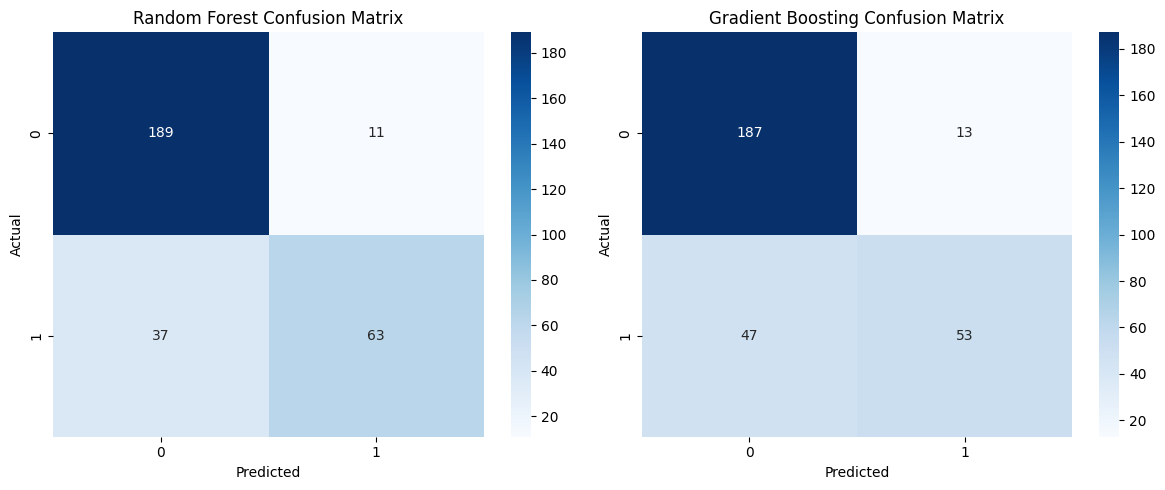

,Accuracy,Precision,Recall,F1-Score
Random Forest,0.84,0.851351,0.63,0.724138
Gradient Boosting,0.80,0.803030,0.53,0.638554


,Model,Faulty Windows Detected,Total Windows
0,One-Class SVM,1,19
1,Random Forest,6,19
2,Gradient Boosting,6,19


In [ ]:
# ================================================
# Part A: Model Development and Fault Detection Design
# CSTR Fault Detection System
# ================================================

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Step 1: Load and preprocess dataset
# -----------------------------
file_path = "/content/cwstep1.xlsx"
data = pd.read_excel(file_path)

# Rename column with typo
data.rename(columns={'Temprature': 'Temperature'}, inplace=True)

# Convert Coldwater Valve to numeric (fixing mixed data types)
data['Coldwater Valve'] = pd.to_numeric(data['Coldwater Valve'], errors='coerce')

# Drop missing values after conversion
data.dropna(inplace=True)

# Features and labels
X = data[['Coldwater Valve', 'Steam Valve', 'CW_Flow', 'Level', 'Temperature']]
y = data['Fault_state']

# Standardize features (important for SVM and boosting models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Step 2: Train One-Class SVM (Unsupervised Model)
# -----------------------------
# Train on 300 normal samples (Fault_state = 0)
normal_samples = X_scaled[y == 0][:300]
ocsvm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')
ocsvm.fit(normal_samples)

# Predict anomalies (-1 = anomaly → 1 fault, 1 = normal → 0 normal)
ocsvm_preds = ocsvm.predict(X_scaled)
ocsvm_preds = np.where(ocsvm_preds == -1, 1, 0)

# -----------------------------
# Step 3: Train Supervised Models (RF and GB)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)

# -----------------------------
# Step 4: Sliding Window Detection Logic
# -----------------------------
def sliding_window_detection(preds, window_size=100, overlap=25, threshold=0.3):
    windows = []
    step = window_size - overlap
    for start in range(0, len(preds) - window_size + 1, step):
        window = preds[start:start + window_size]
        faulty_ratio = np.mean(window)
        windows.append(1 if faulty_ratio > threshold else 0)
    return np.array(windows)

# Apply sliding window to each model
ocsvm_windows = sliding_window_detection(ocsvm_preds)
rf_windows = sliding_window_detection(rf.predict(X_scaled))
gb_windows = sliding_window_detection(gb.predict(X_scaled))

# -----------------------------
# Step 5: Evaluation Metrics for RF & GB
# -----------------------------
# Random Forest metrics
rf_acc = accuracy_score(y_test, rf_preds)
rf_prec = precision_score(y_test, rf_preds)
rf_rec = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)

# Gradient Boosting metrics
gb_acc = accuracy_score(y_test, gb_preds)
gb_prec = precision_score(y_test, gb_preds)
gb_rec = recall_score(y_test, gb_preds)
gb_f1 = f1_score(y_test, gb_preds)

# Compile results into a DataFrame
results = pd.DataFrame({
    "Accuracy": [rf_acc, gb_acc],
    "Precision": [rf_prec, gb_prec],
    "Recall": [rf_rec, gb_rec],
    "F1-Score": [rf_f1, gb_f1]
}, index=["Random Forest", "Gradient Boosting"])

# -----------------------------
# Step 6: Confusion Matrices
# -----------------------------
rf_cm = confusion_matrix(y_test, rf_preds)
gb_cm = confusion_matrix(y_test, gb_preds)

# Plot confusion matrices for both models
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(gb_cm, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Gradient Boosting Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# -----------------------------
# Step 7: Sliding Window Results Summary
# -----------------------------
window_summary = pd.DataFrame({
    "Model": ["One-Class SVM", "Random Forest", "Gradient Boosting"],
    "Faulty Windows Detected": [ocsvm_windows.sum(), rf_windows.sum(), gb_windows.sum()],
    "Total Windows": [len(ocsvm_windows), len(rf_windows), len(gb_windows)]
})

display(results)
display(window_summary)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluate One-Class SVM predictions
svm_acc = accuracy_score(y, ocsvm_preds)
svm_prec = precision_score(y, ocsvm_preds)
svm_rec = recall_score(y, ocsvm_preds)
svm_f1 = f1_score(y, ocsvm_preds)

# Print results
print("=== One-Class SVM Evaluation Metrics ===")
print(f"Accuracy: {svm_acc:.2f}")
print(f"Precision: {svm_prec:.2f}")
print(f"Recall: {svm_rec:.2f}")
print(f"F1-Score: {svm_f1:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y, ocsvm_preds))
print("\nClassification Report:")
print(classification_report(y, ocsvm_preds))


=== One-Class SVM Evaluation Metrics ===
Accuracy: 0.68
Precision: 0.57
Recall: 0.18
F1-Score: 0.28

Confusion Matrix:
[[930  70]
 [409  91]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.93      0.80      1000
           1       0.57      0.18      0.28       500

    accuracy                           0.68      1500
   macro avg       0.63      0.56      0.54      1500
weighted avg       0.65      0.68      0.62      1500



part B

In [ ]:
!pip install lime shap

Saved LIME figure: partB_figures/lime_1044.png
Saved LIME figure: partB_figures/lime_1063.png
Saved LIME figure: partB_figures/lime_1074.png
Saved LIME figure: partB_figures/lime_1096.png
Saved LIME figure: partB_figures/lime_1140.png
Saved LIME figure: partB_figures/lime_1142.png
Saved SHAP figure: partB_figures/shap_1044.png
Saved SHAP figure: partB_figures/shap_1063.png
Saved SHAP figure: partB_figures/shap_1074.png
Saved SHAP figure: partB_figures/shap_1096.png
Saved SHAP figure: partB_figures/shap_1140.png
Saved SHAP figure: partB_figures/shap_1142.png
Saved SHAP summary figure: partB_figures/shap_summary.png


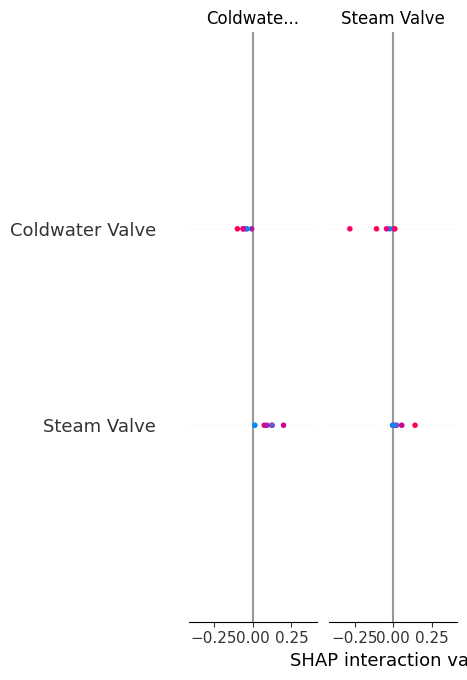

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import lime.lime_tabular
import shap
import os

# Create output folder for figures
output_dir = "partB_figures"
os.makedirs(output_dir, exist_ok=True)

# Random Forest model from Part A
model = rf

# Feature names
feature_names = ['Coldwater Valve', 'Steam Valve', 'CW_Flow', 'Level', 'Temperature']

# Selected faulty data points
selected_points = [1044, 1063, 1074, 1096, 1140, 1142]

# --------------------------
# LIME Explanations (Static Bar Charts)
# --------------------------
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    training_labels=y_train,
    feature_names=feature_names,
    class_names=['Normal', 'Faulty'],
    mode='classification'
)

for idx in selected_points:
    exp = explainer_lime.explain_instance(X_scaled[idx], model.predict_proba, num_features=5)

    fig = exp.as_pyplot_figure()
    plt.title(f"LIME Explanation for Data Point {idx}")
    lime_path = os.path.join(output_dir, f"lime_{idx}.png")
    fig.savefig(lime_path, bbox_inches="tight")
    plt.close(fig)
    print(f"Saved LIME figure: {lime_path}")

# --------------------------
# SHAP Explanations (Bar + Summary Plots)
# --------------------------
explainer_shap = shap.TreeExplainer(model)
shap_values_list = explainer_shap.shap_values(X_scaled[selected_points])

# Handle binary classification -> choose "Faulty" class
if isinstance(shap_values_list, list) and len(shap_values_list) == 2:
    shap_vals = shap_values_list[1]
else:
    shap_vals = shap_values_list

# Individual SHAP bar plots
for i, idx in enumerate(selected_points):
    sample_expl = shap.Explanation(
        values=shap_vals[i],
        base_values=np.array([np.mean(shap_vals)]),
        data=np.array(X_scaled[idx]).reshape(1, -1),
        feature_names=feature_names
    )
    fig, ax = plt.subplots()
    shap.plots.bar(sample_expl, show=False)
    plt.title(f"SHAP Feature Contributions for Data Point {idx}")
    shap_path = os.path.join(output_dir, f"shap_{idx}.png")
    plt.savefig(shap_path, bbox_inches="tight")
    plt.close(fig)
    print(f"Saved SHAP figure: {shap_path}")

# SHAP summary plot for all selected samples
fig_summary, ax = plt.subplots()
shap.summary_plot(
    shap_vals,
    np.array(X_scaled[selected_points]),
    feature_names=feature_names,
    show=False
)
summary_path = os.path.join(output_dir, "shap_summary.png")
plt.savefig(summary_path, bbox_inches="tight")
plt.close(fig_summary)
print(f"Saved SHAP summary figure: {summary_path}")



=== Comparative Feature Importance Table ===
                             LIME (Top 3 Count)  SHAP (Top 3 Count)
-0.05 < CW_Flow <= 0.60                       2                   0
-0.53 < CW_Flow <= -0.05                      1                   0
-0.63 < Level <= 0.06                         2                   0
-0.64 < Temperature <= 0.15                   3                   0
CW_Flow <= -0.53                              2                   0
CW_Flow > 0.60                                1                   0
Coldwater Valve                               0                   9
Level > 0.63                                  4                   0
Steam Valve                                   0                   9
Temperature <= -0.64                          2                   0
Temperature > 0.66                            1                   0
Saved comparison table: partB_figures/lime_shap_comparison.csv


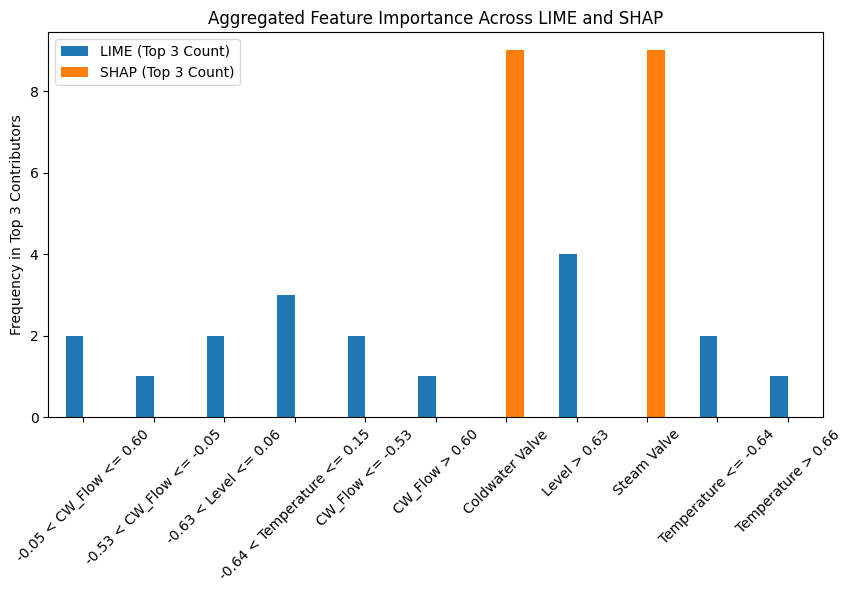

Saved bar chart: partB_figures/lime_shap_bar_chart.png


In [ ]:
# ============================================
# Aggregated Feature Importance: LIME vs SHAP
# ============================================

import pandas as pd

# --- Aggregate top 3 features from LIME ---
lime_feature_counts = {}
for res in lime_results:
    for feat, _ in res[:3]:   # top 3 features
        lime_feature_counts[feat] = lime_feature_counts.get(feat, 0) + 1

# --- Aggregate top 3 features from SHAP ---
shap_feature_counts = {}
for vals in shap_vals:
    top_feats = np.argsort(np.abs(vals))[-3:]   # get indices of top 3
    for feat in top_feats:
        feat_idx = int(np.ravel(feat)[0])  # FIX: flatten and convert to int
        fname = feature_names[feat_idx]
        shap_feature_counts[fname] = shap_feature_counts.get(fname, 0) + 1

# --- Build comparison table ---
comparison = pd.DataFrame({
    "LIME (Top 3 Count)": pd.Series(lime_feature_counts),
    "SHAP (Top 3 Count)": pd.Series(shap_feature_counts)
}).fillna(0).astype(int)

print("\n=== Comparative Feature Importance Table ===")
print(comparison)

# --- Save table as CSV ---
comparison_path = os.path.join(output_dir, "lime_shap_comparison.csv")
comparison.to_csv(comparison_path)
print(f"Saved comparison table: {comparison_path}")

# --- Bar chart visualization ---
comparison.plot(kind="bar", figsize=(10,5))
plt.title("Aggregated Feature Importance Across LIME and SHAP")
plt.ylabel("Frequency in Top 3 Contributors")
plt.xticks(rotation=45)
bar_chart_path = os.path.join(output_dir, "lime_shap_bar_chart.png")
plt.savefig(bar_chart_path, bbox_inches="tight")
plt.show()
print(f"Saved bar chart: {bar_chart_path}")
